<a href="https://colab.research.google.com/github/ShibleNK/ml-practice/blob/main/lineaer_clf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
importimport sklearn
from sklearn import datasets

iris = datasets.load_iris()
X_temp = iris.data
y_temp = iris.target

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# dataset contains first two attributes
X, y = X_temp[:,[0,1]], y_temp
# testset contains 25% , randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)

# features standardize
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
import numpy as np
print('Training set mean:{:.2f} and standard deviation:{:.2f}'.format(np.average(X_train), np.std(X_train)))
print('Testing set mean:{:.2f} and standard deviation:{:.2f}'.format(np.average(X_test), np.std(X_test)))


Training set mean:0.00 and standard deviation:1.00
Testing set mean:0.13 and standard deviation:0.71


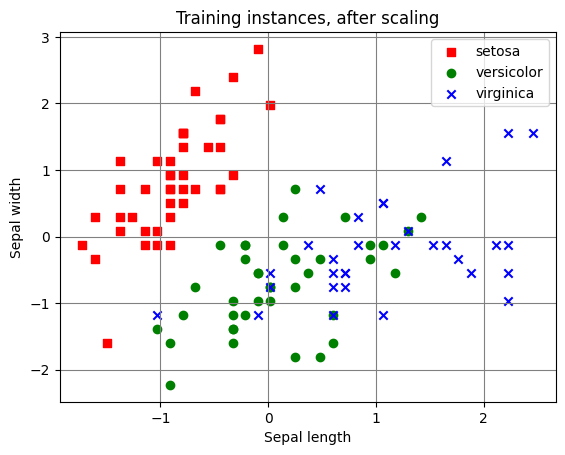

In [ ]:
import matplotlib.pyplot as plt
color_mk = [['red', 's'],['green', 'o'], ['blue', 'x']]
plt.figure('Training Data')

for i in range(len(color_mk)):
  xs = X_train[:,0][y_train == i]
  ys = X_train[:, 1][y_train == i]
  plt.scatter(xs, ys, c=color_mk[i][0], marker=color_mk[i][1])

plt.style.use('default')
plt.grid(c='grey')

plt.title('Training instances, after scaling')
plt.legend(iris.target_names)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

In [ ]:
import copy
y_train_setosa = copy.copy(y_train)

y_train_setosa[y_train_setosa > 0] = 1
y_test_setosa = copy.copy(y_test)
y_test_setosa[y_test_setosa > 0] = 1
print('New training target classes:\n{0}'.format(y_train_setosa))

New training target classes:
[1 0 1 1 1 0 0 1 0 1 0 0 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0
 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1
 0 0 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1
 0]


In [ ]:
from sklearn import linear_model
clf = linear_model.SGDClassifier(loss='log_loss', random_state=42)


In [ ]:
clf.fit(X_train, y_train_setosa)

SGDClassifier(loss='log_loss', random_state=42)

In [ ]:
print(clf.coef_, clf.intercept_)

[[ 21.76180381 -10.51985217]] [13.90763024]


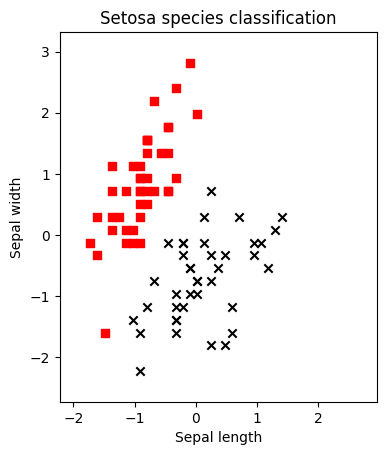

In [ ]:
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max()+.5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max()+.5
xs = np.arange(x_min, x_max, 0.5)

fig,axes = plt.subplots()

axes.set_aspect('equal')
axes.set_title('Setosa species classification')
axes.set_xlabel('Sepal length')
axes.set_ylabel('Sepal width')
axes.set_xlim(x_min, x_max)
axes.set_ylim(y_min, y_max)

plt.sca(axes)

plt.scatter(X_train[:, 0][y_train == 0], X_train[:, 1][y_train == 0] , c='red', marker='s')
plt.scatter(X_train[:,0][y_train == 1], X_train[:,1][y_train == 1], c ='black', marker='x')

ys = (-clf.intercept_[0] - xs * clf.coef_[0,0]/clf.coef_[0, 1])

plt.plot(xs,ys, c='blue', linewidth=3) # Modified this line to change color and linewidth
plt.show()

In [ ]:
print('If  the flower has 4.6 petal width and 3.2 petal length is a {}'.format(iris.target_names[clf.predict(scaler.transform([[4.6, 3.2]]))]))

If  the flower has 4.6 petal width and 3.2 petal length is a ['setosa']


/tmp/ipython-input-1499188829.py:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], cmap=plt.cm.RdYlBu, edgecolor='black', s=15)
/tmp/ipython-input-1499188829.py:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], cmap=plt.cm.RdYlBu, edgecolor='black', s=15)
/tmp/ipython-input-1499188829.py:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], cmap=plt.cm.RdYlBu, edgecolor='black', s=15)
/tmp/ipython-input-1499188829.py:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], cmap=plt.cm.RdYlBu, edgecolor='black', s=15)
/tmp/ipython-input-1

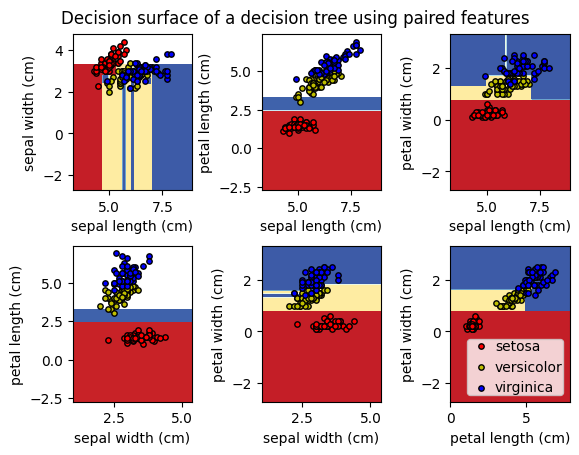

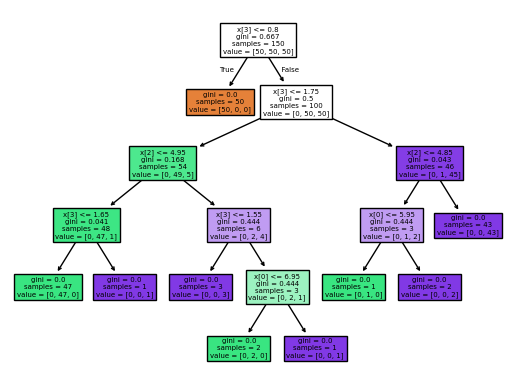

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

n_classes = 3
plot_colors = 'ryb'
plot_step = 0.02

for pairidx, pair in  enumerate([[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]):
  X = iris.data[:, pair]
  y = iris.target
  clf = DecisionTreeClassifier().fit(X, y)
  plt.subplot(2,3, pairidx + 1)

  x_min, x_max = X[:, 0].min() - 1, X[:,0].max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
  plt.tight_layout(h_pad=0.5, w_pad=0.5, pad =2.5)
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs =plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

  plt.xlabel(iris.feature_names[pair[0]])
  plt.ylabel(iris.feature_names[pair[1]])

  for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y==i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0 , handletextpad= 0)
plt.axis("tight")

plt.figure()
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.show()